In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_17 = pd.read_csv('/content/drive/MyDrive/Dart-B 의료데이터 실습/datas_17_m.csv', encoding='cp949', index_col=0)
data_20 = pd.read_csv('/content/drive/MyDrive/Dart-B 의료데이터 실습/datas_20_m.csv', encoding='cp949', index_col=0)

In [ ]:
data_17

,지역,년,주,주 평균 일교차(°C),전날 대비 최고 기온 상승 최대 변화(°C),전날 대비 최저 기온 하강 최대 변화(°C),주평균 최대 풍속(m/s),주평균 평균 풍속(m/s),SO2_최대값,CO_최대값,O3_최대값,NO2_최대값,PM10_최대값,PM25_최대값,풍향(N~NE),풍향(NE~E),풍향(E~SE),풍향(SE~S),풍향(S~SW),풍향(SW~W),풍향(W~NW),풍향(NW~N),환자 수,100만명 당 환자수,주 평균 기온(°C) 5도 미만,주 평균 기온(°C) 5도 이상 10도 미만,주 평균 기온(°C) 10도 이상 15도 미만,주 평균 기온(°C) 15도 이상 20도 미만,주 평균 기온(°C) 20도 이상 25도 미만,주 평균 기온(°C) 25도 이상,상대습도 (건조),상대습도 (적정),상대습도 (습함)
0,광주,2017,2,7.228571,3.5,4.100000,5.4,1.928571,0.008429,1.271429,0.042286,0.059857,140.857143,77.714286,4,1,0,0,1,0,1,0,28.0,19.128688,1,0,0,0,0,0,0,1,0
1,대구,2017,2,8.342857,4.9,3.900000,9.1,3.985714,0.010000,1.571429,0.042571,0.049857,152.428571,91.142857,0,0,0,0,0,2,2,3,44.0,17.776119,1,0,0,0,0,0,0,1,0
2,대전,2017,2,8.971429,3.8,5.900000,5.9,1.914286,0.008857,1.514286,0.033857,0.054000,103.714286,56.428571,0,0,0,0,1,0,0,6,35.0,23.298742,1,0,0,0,0,0,0,1,0
3,부산,2017,2,8.700000,3.8,4.100000,10.2,3.914286,0.010143,0.928571,0.041286,0.052000,85.285714,61.142857,0,0,0,0,0,1,4,2,51.0,14.694641,1,0,0,0,0,0,1,0,0
4,서울,2017,2,8.114286,4.5,7.100000,7.0,2.957143,0.009857,1.828571,0.015714,0.058000,99.571429,68.857143,0,0,0,0,0,2,5,0,216.0,21.912414,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,대전,2019,51,9.057143,3.5,5.200000,4.0,0.985714,0.006714,1.000000,0.041286,0.032857,92.142857,50.142857,0,0,2,0,0,5,0,0,58.0,39.325500,1,0,0,0,0,0,0,1,0
1046,부산,2019,51,7.500000,3.7,4.400000,7.2,2.228571,0.015000,1.200000,0.082714,0.049714,104.714286,60.428571,0,0,1,0,0,1,0,5,63.0,18.454287,0,1,0,0,0,0,0,1,0
1047,서울,2019,51,7.500000,6.9,4.900000,4.8,2.114286,0.009286,1.471429,0.030286,0.072429,102.000000,50.285714,0,3,0,0,0,0,1,3,216.0,22.201421,1,0,0,0,0,0,0,1,0
1048,울산,2019,51,8.942857,4.2,4.800000,5.2,2.142857,0.013143,0.600000,0.057857,0.024429,42.571429,24.571429,0,0,0,0,0,0,2,5,28.0,24.389840,0,1,0,0,0,0,0,1,0


## 서울 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

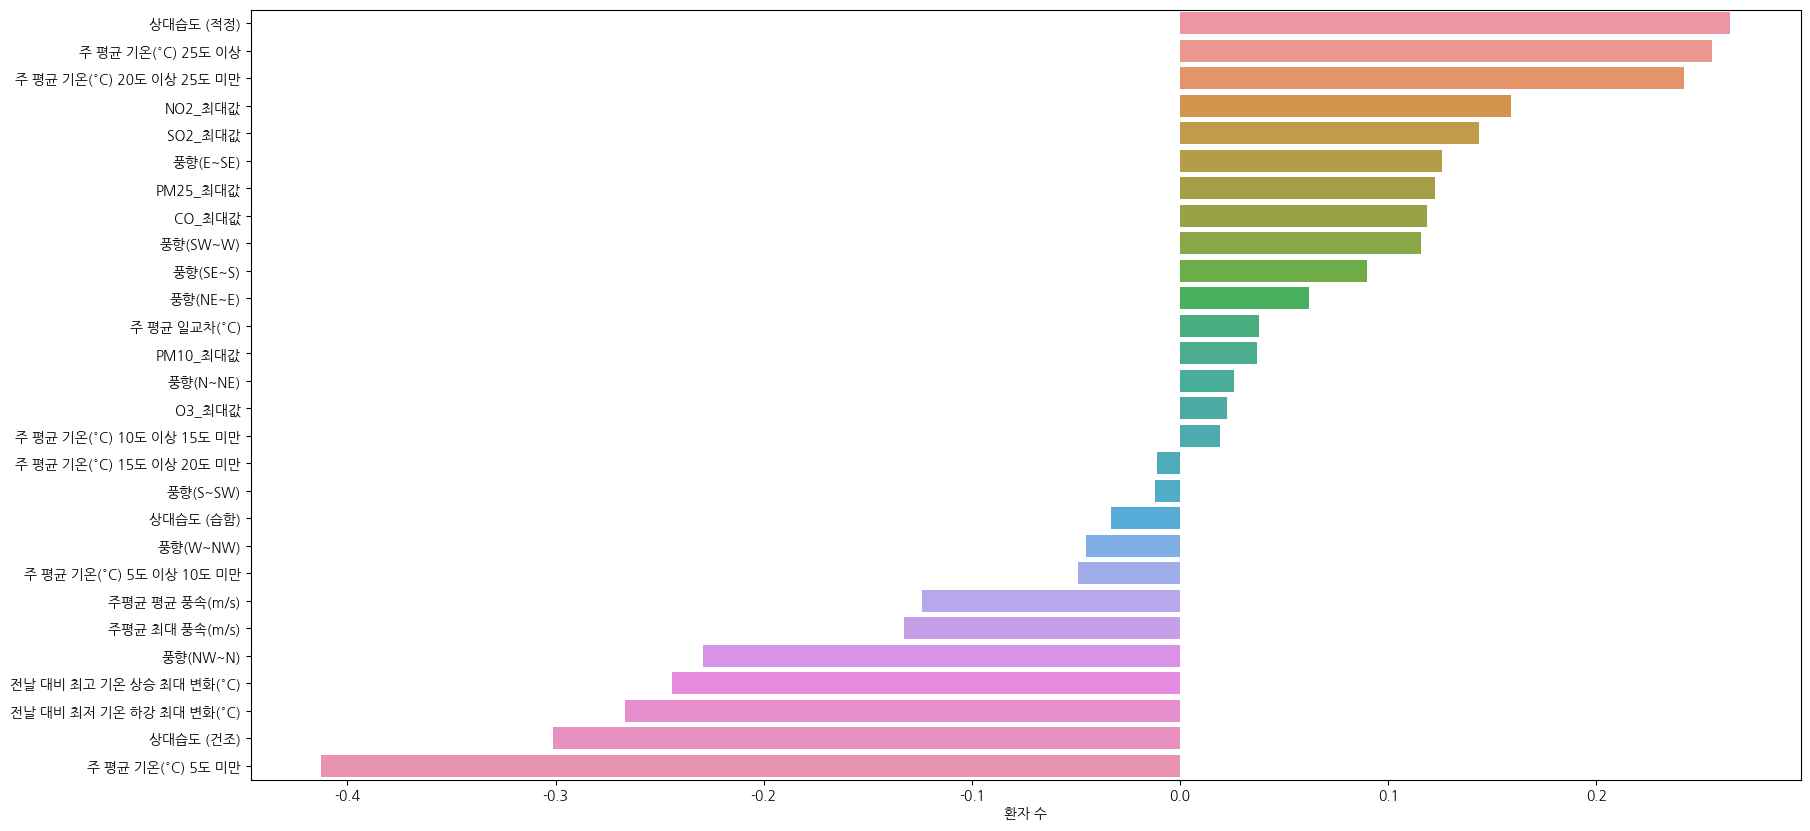

In [ ]:
plt.figure(figsize=(20, 10))
corr_1 = data_17[data_17['지역'] == '서울'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_1, y=corr_1.index)

## 서울 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

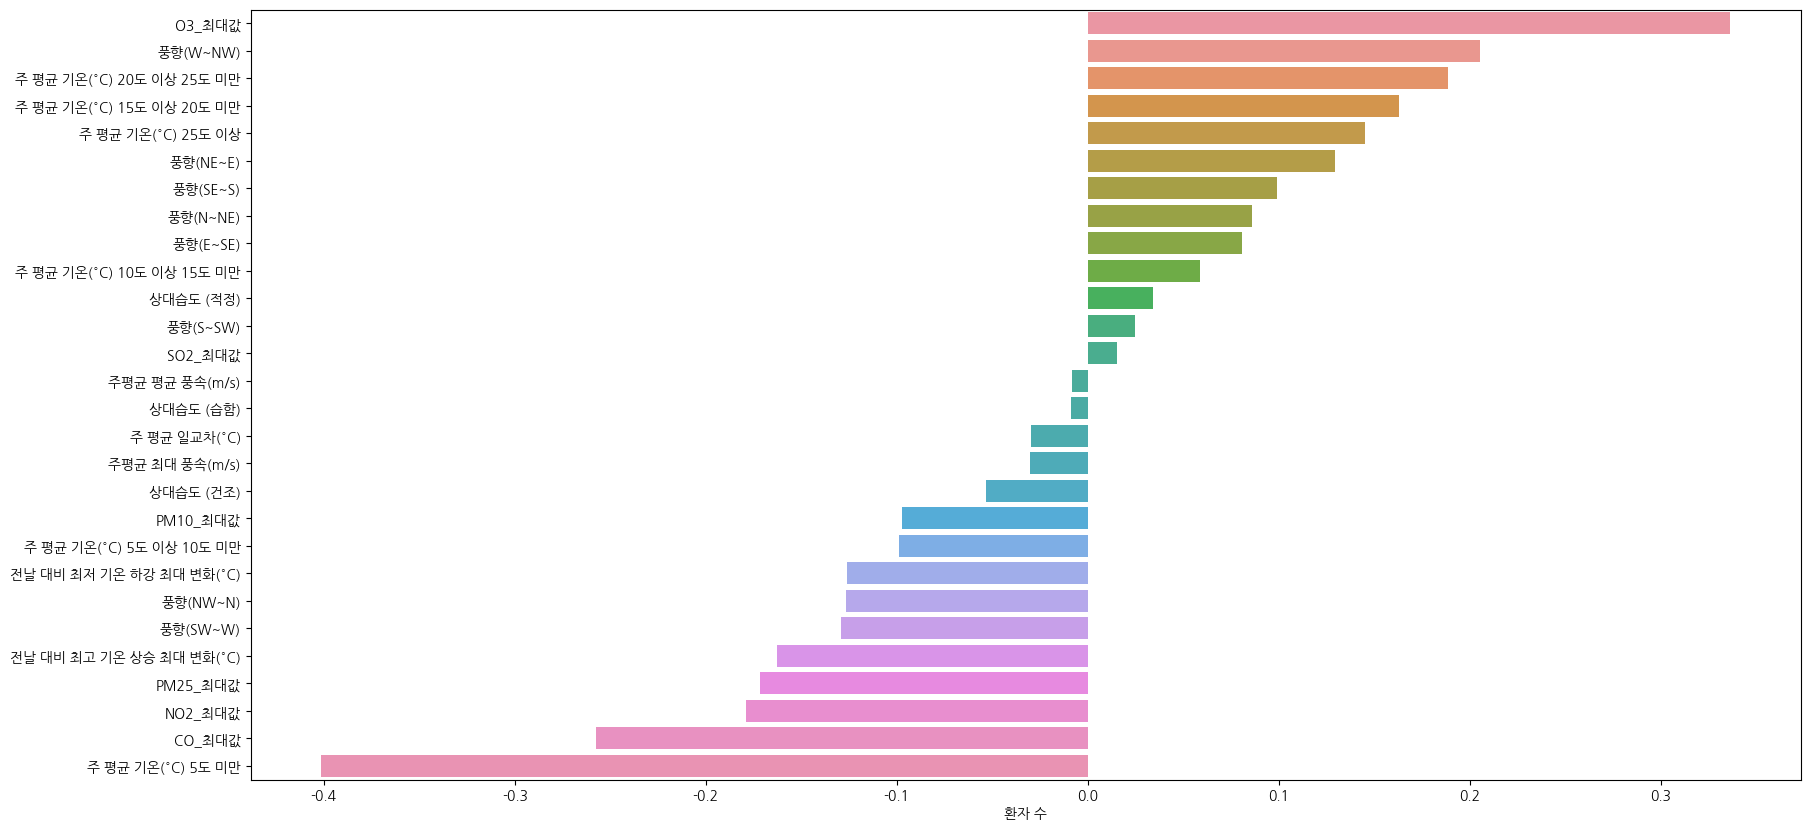

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '서울'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 인천 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

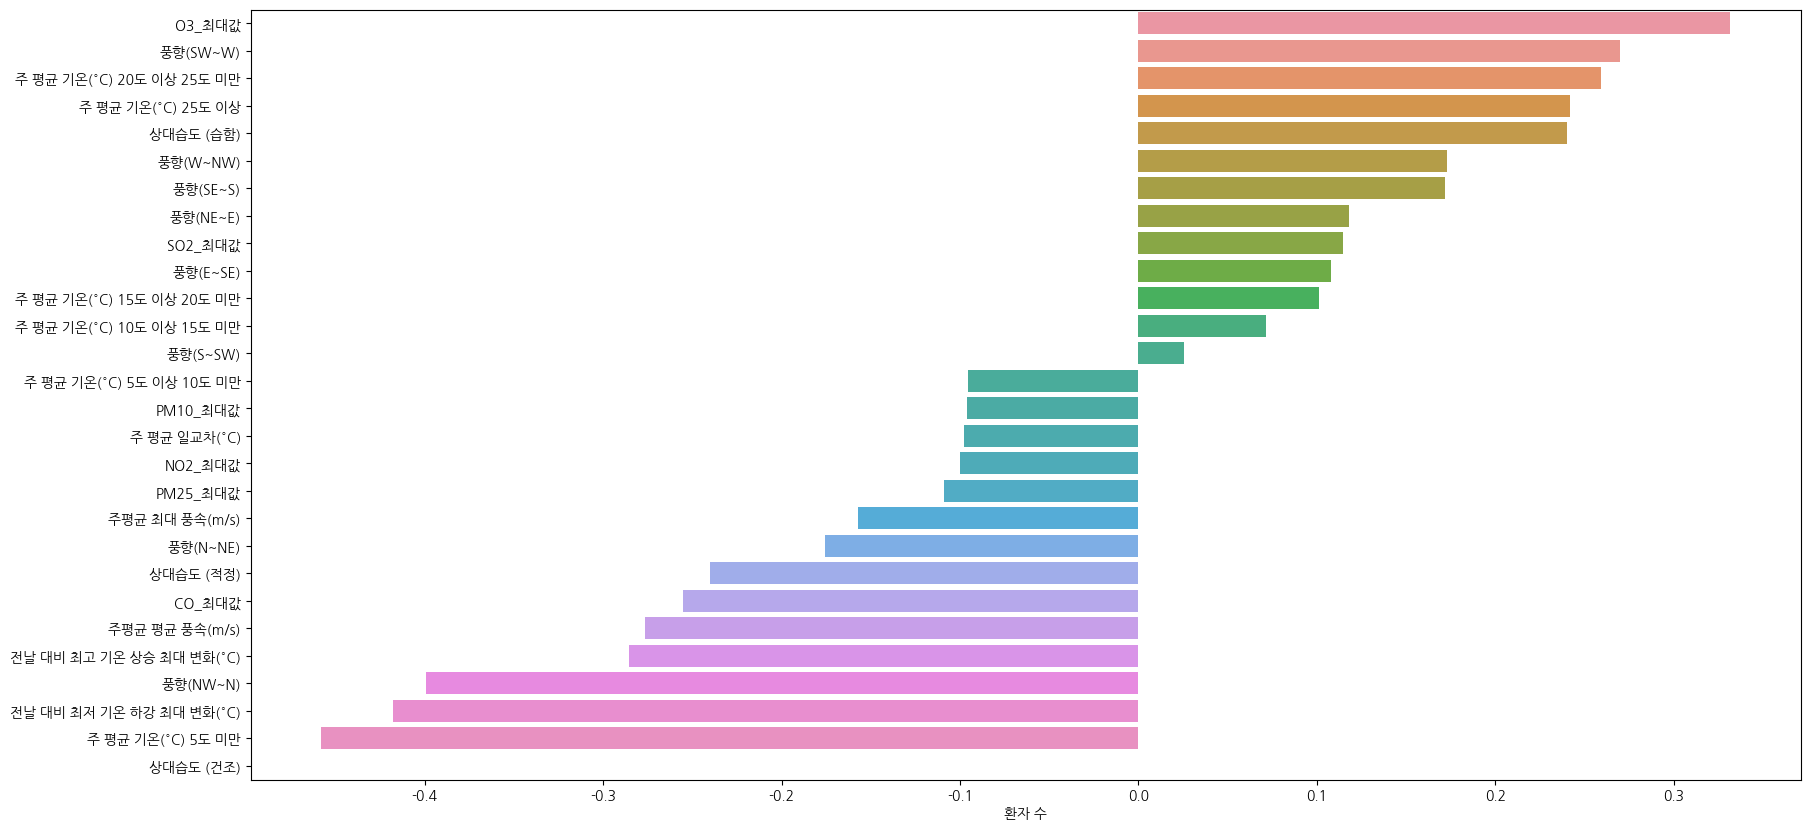

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '인천'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 인천 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

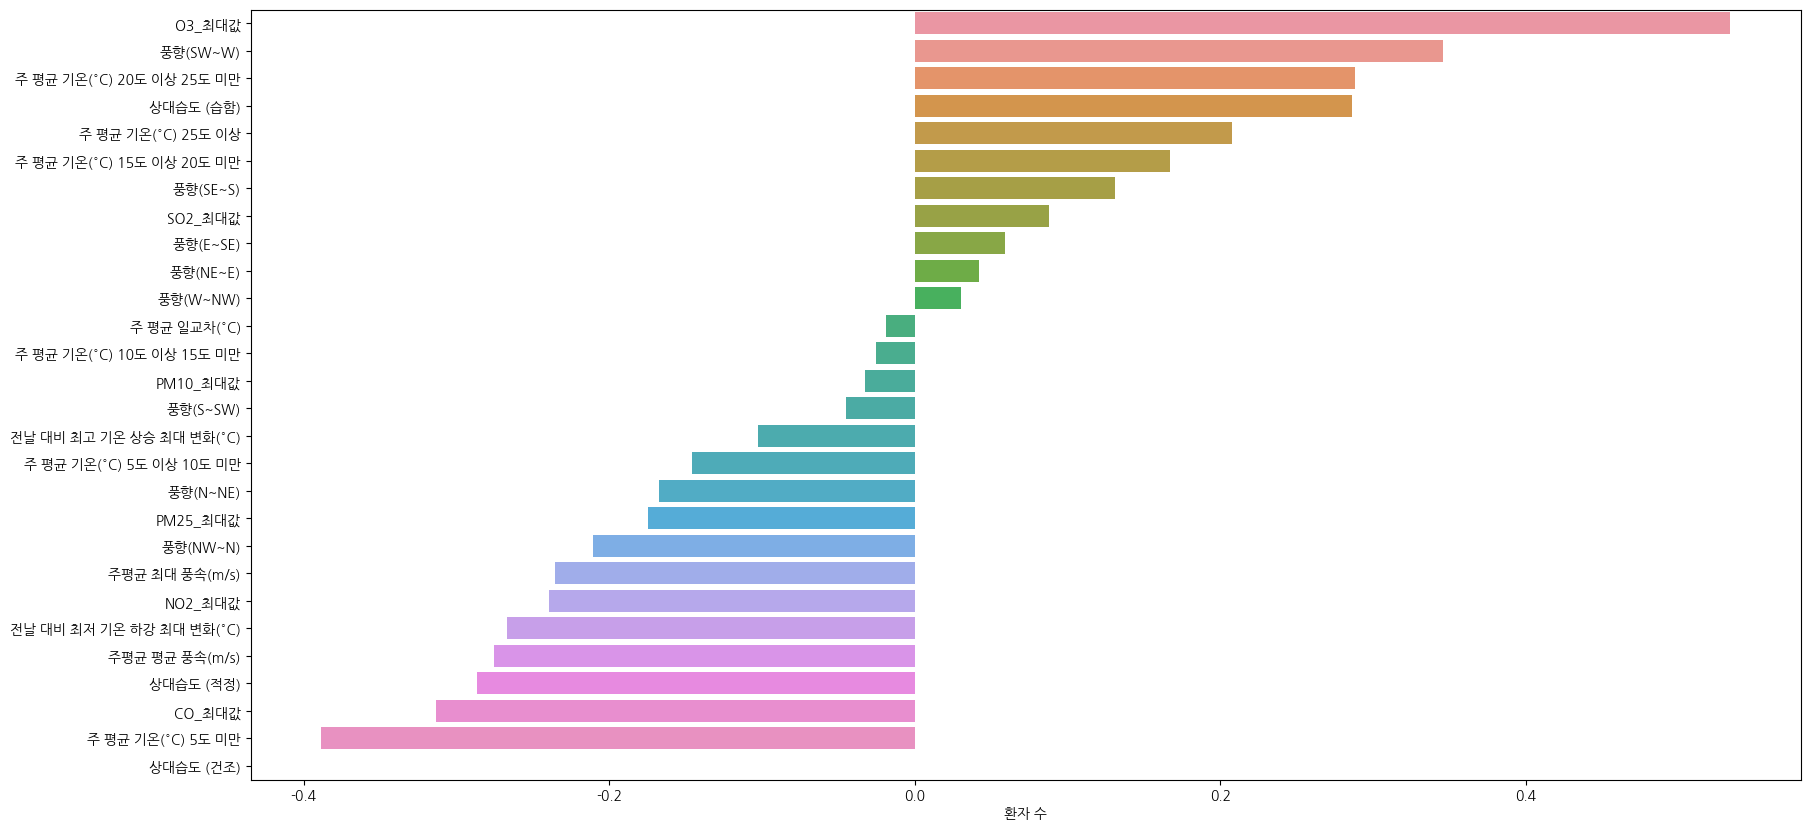

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '인천'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 광주 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

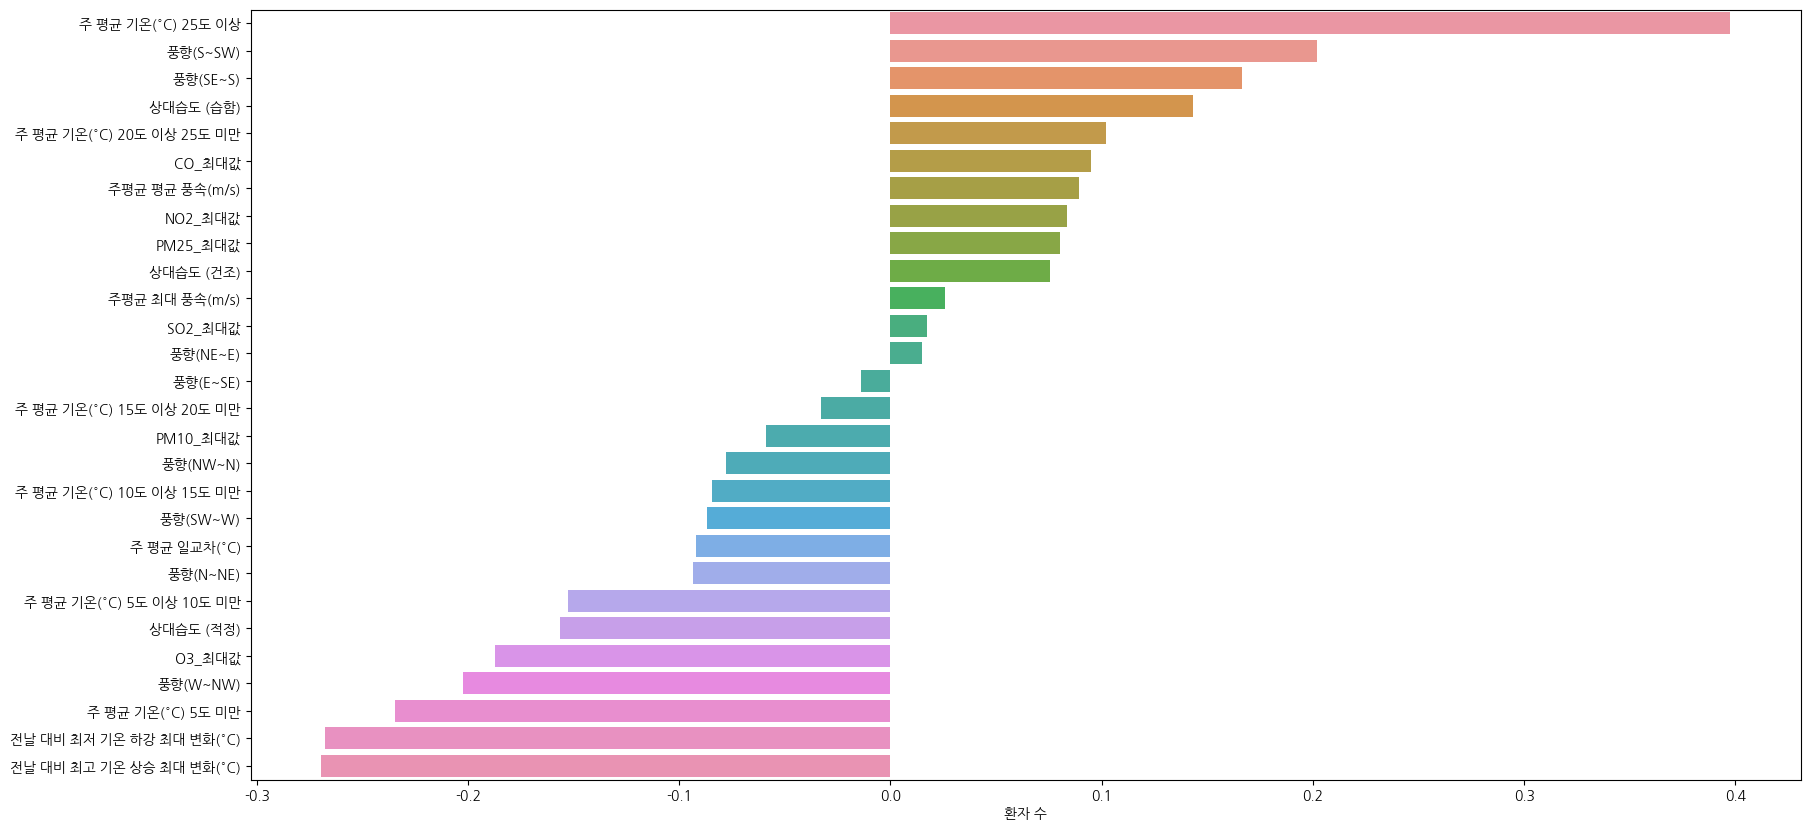

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '광주'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 광주 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

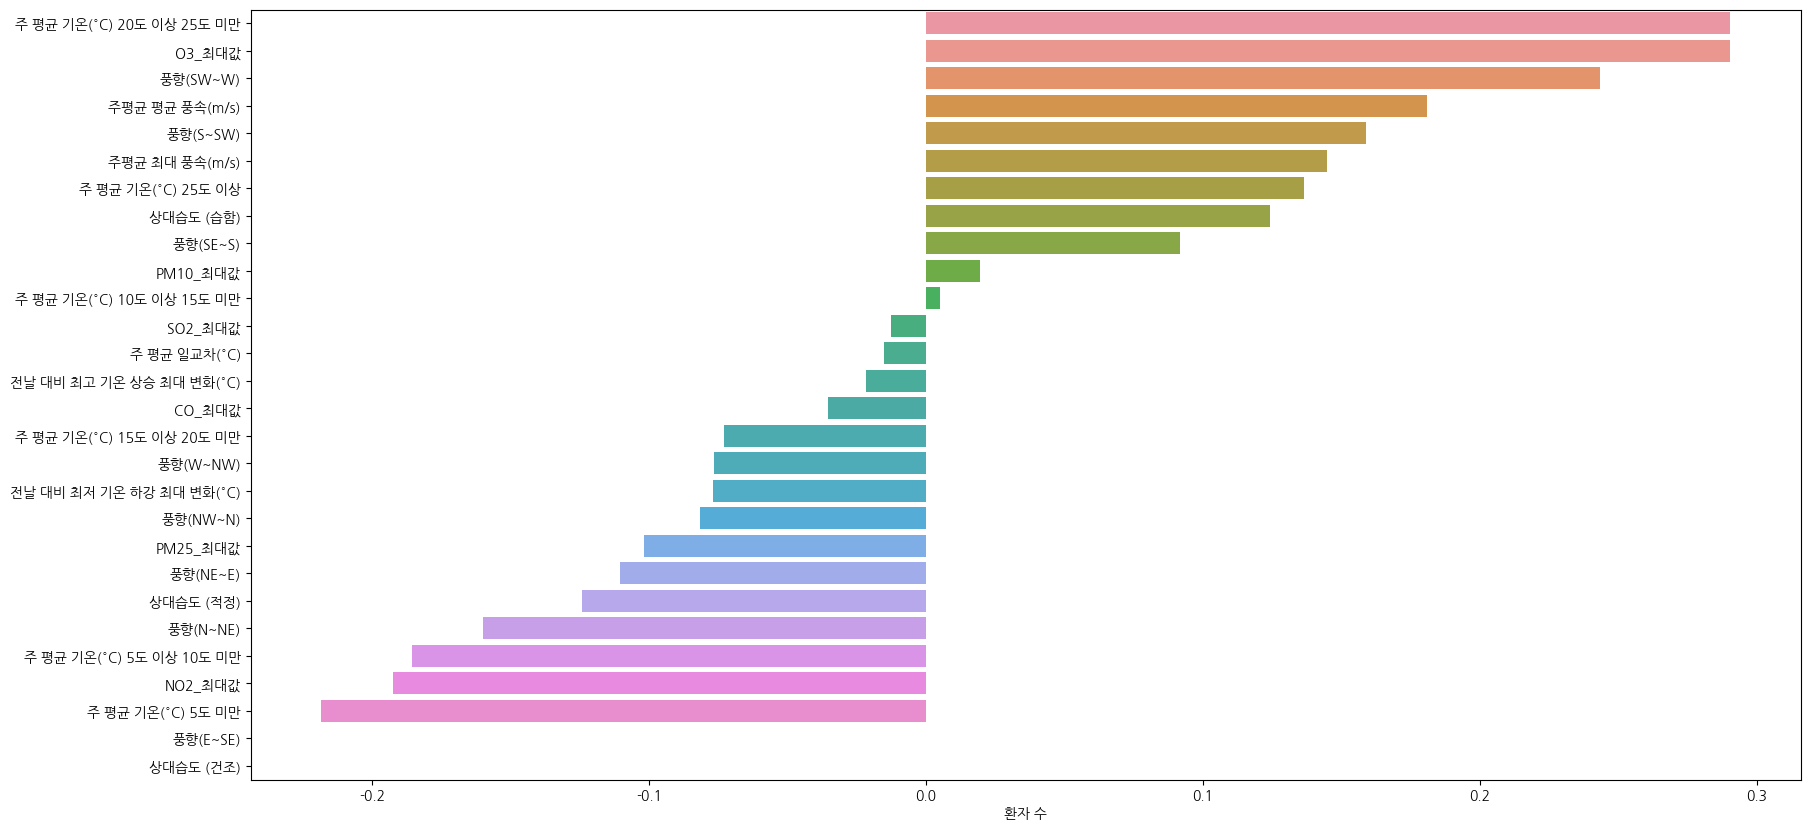

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '광주'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 대구 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

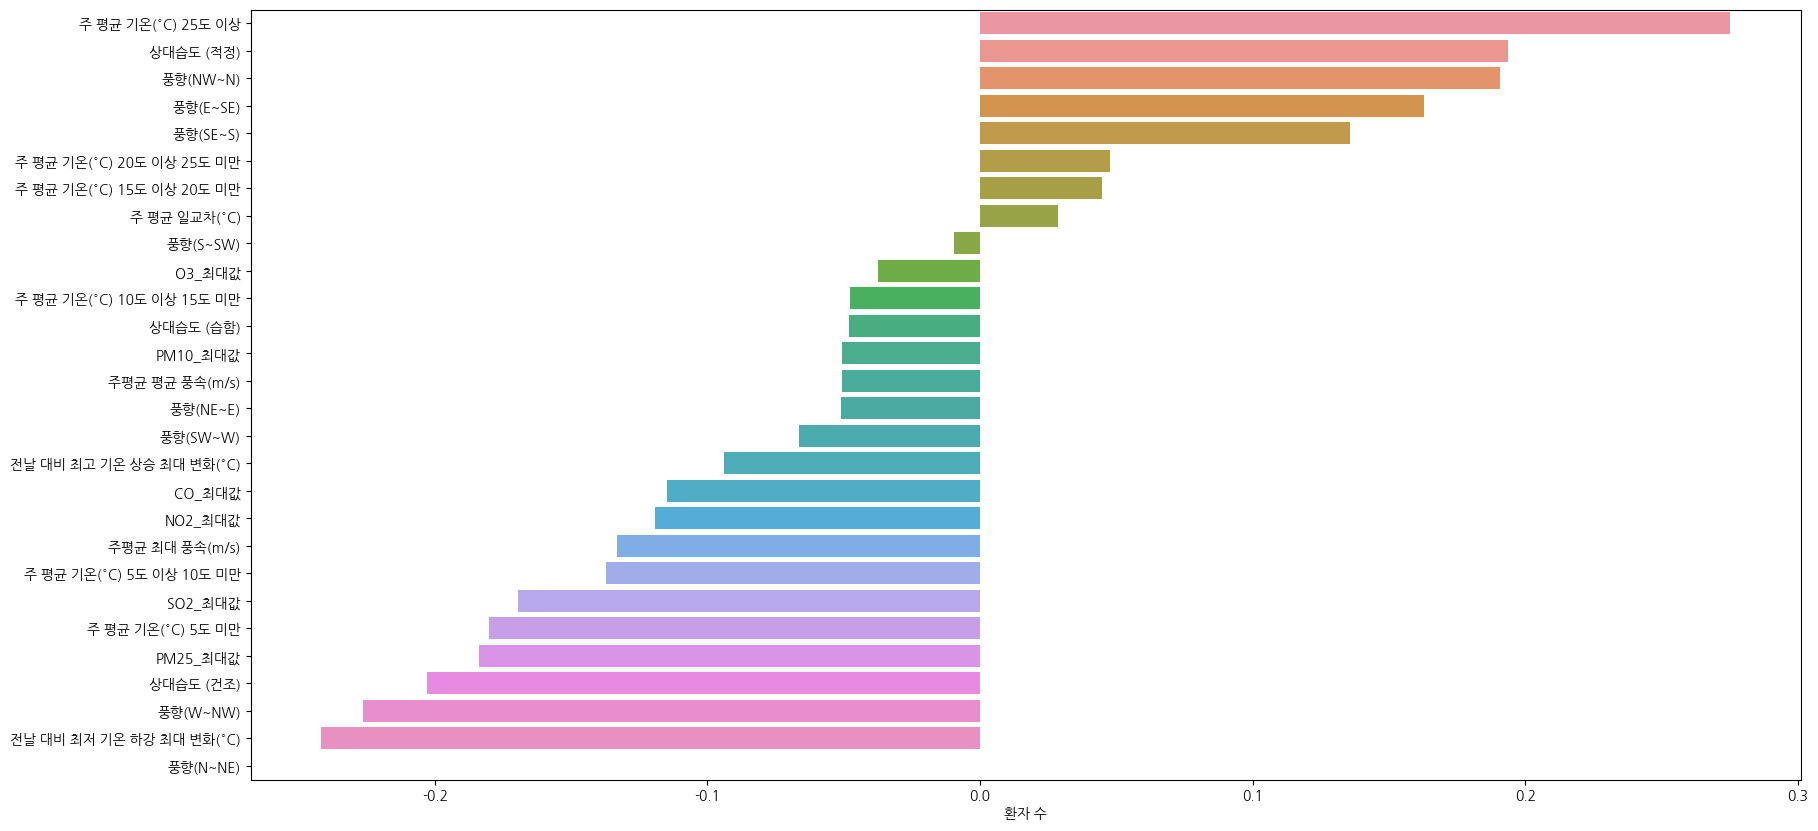

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '대구'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 대구 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

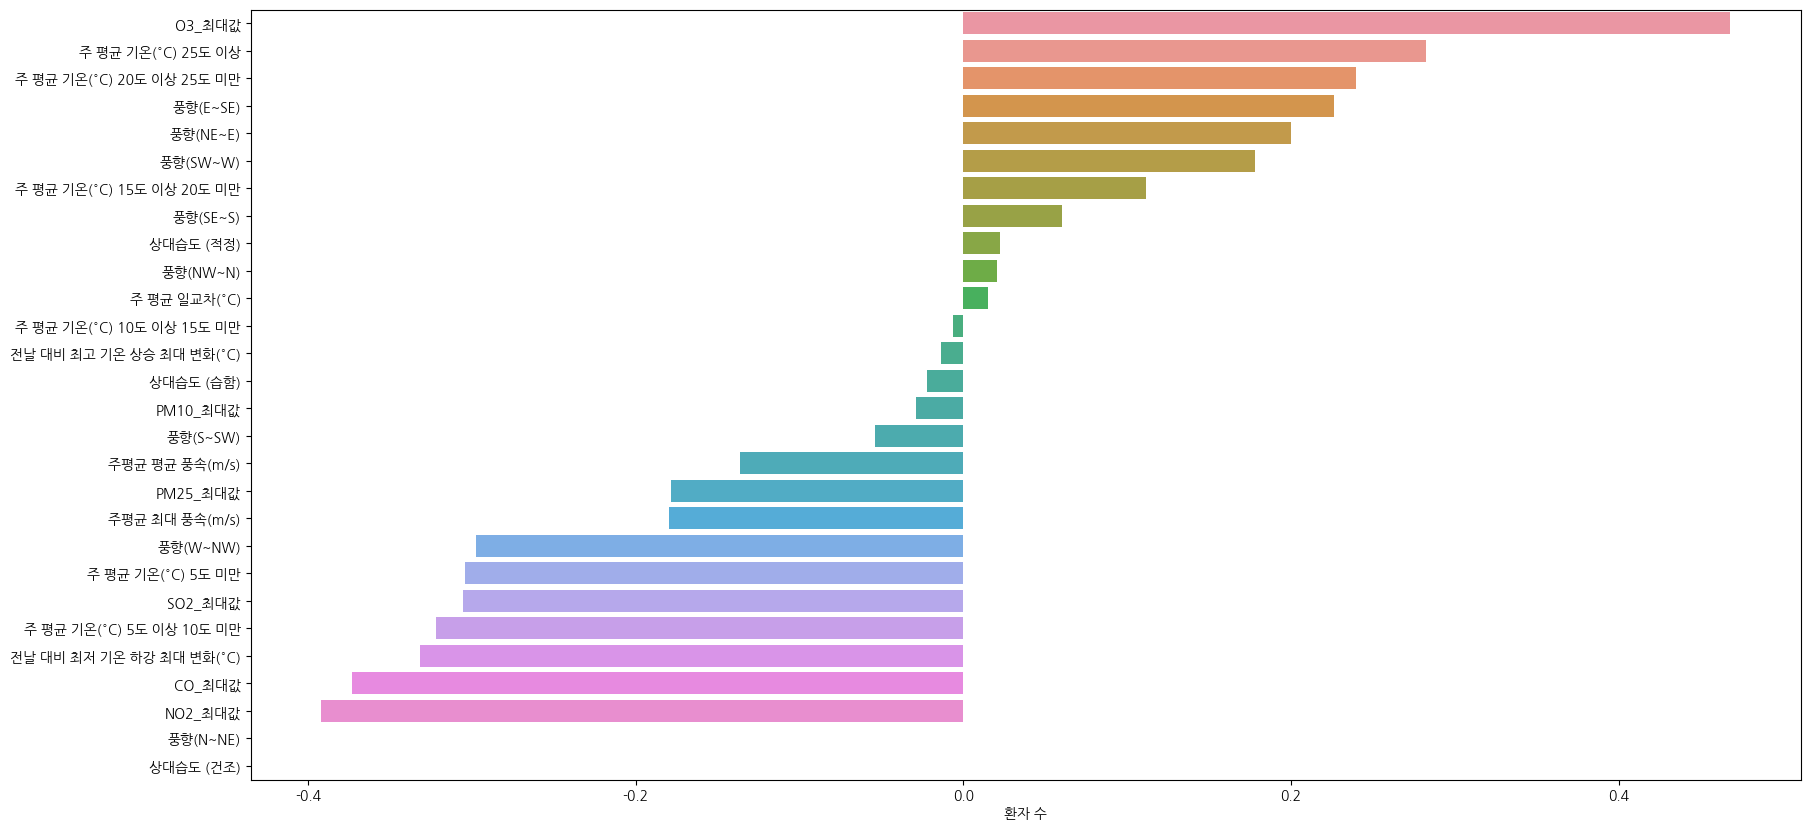

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '대구'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 대전 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

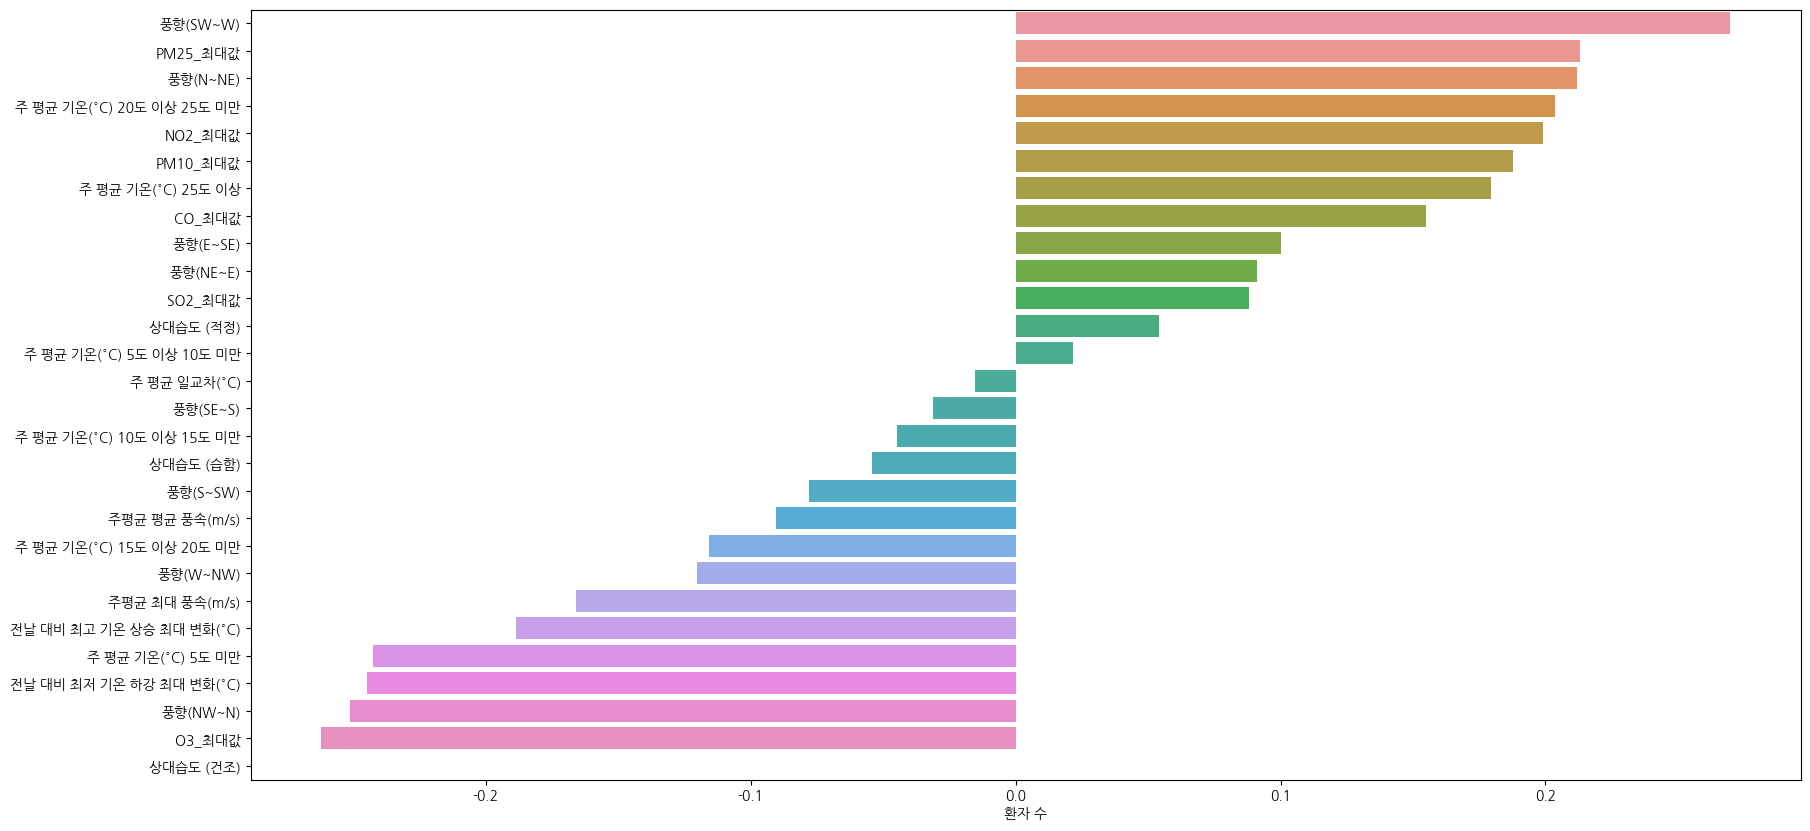

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '대전'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 대전 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

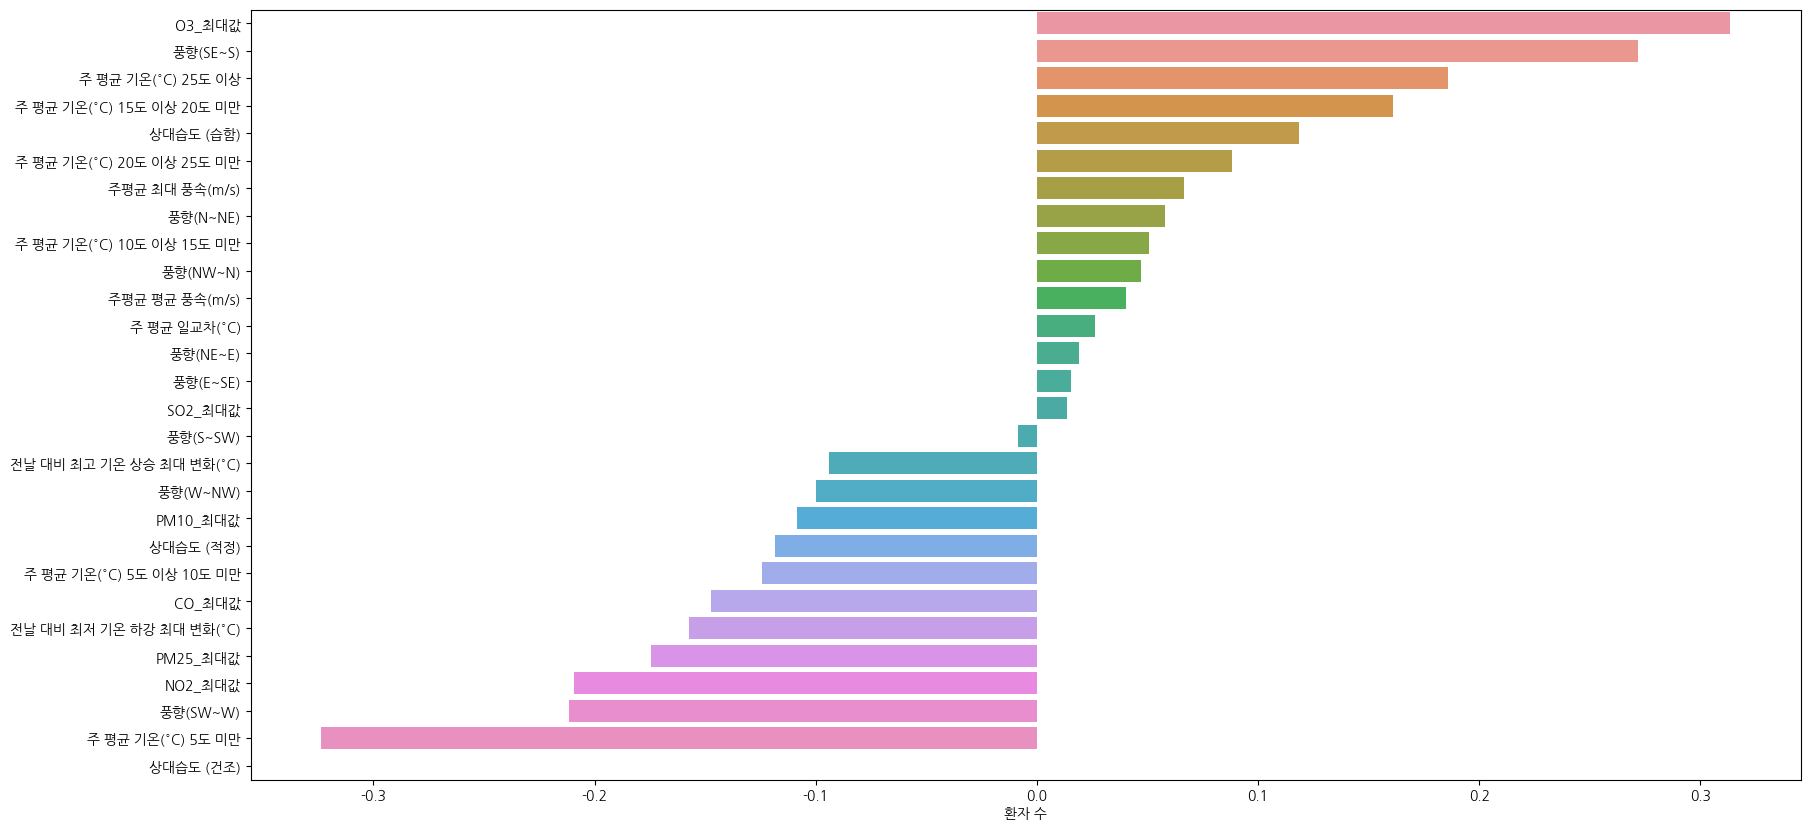

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '대전'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 부산 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

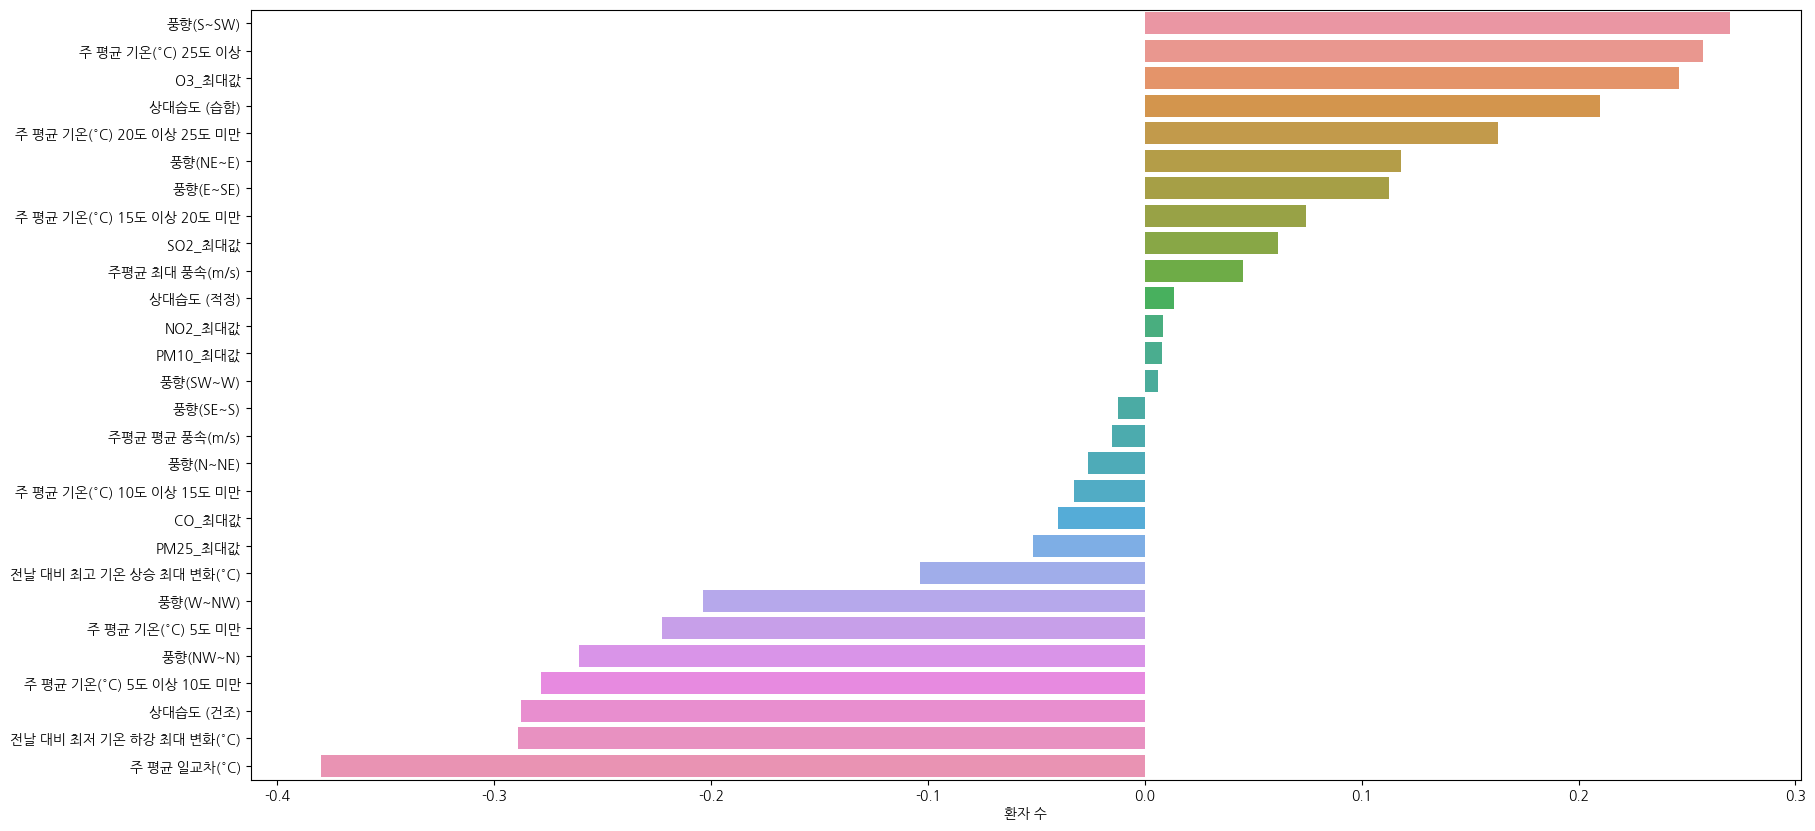

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '부산'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 부산 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

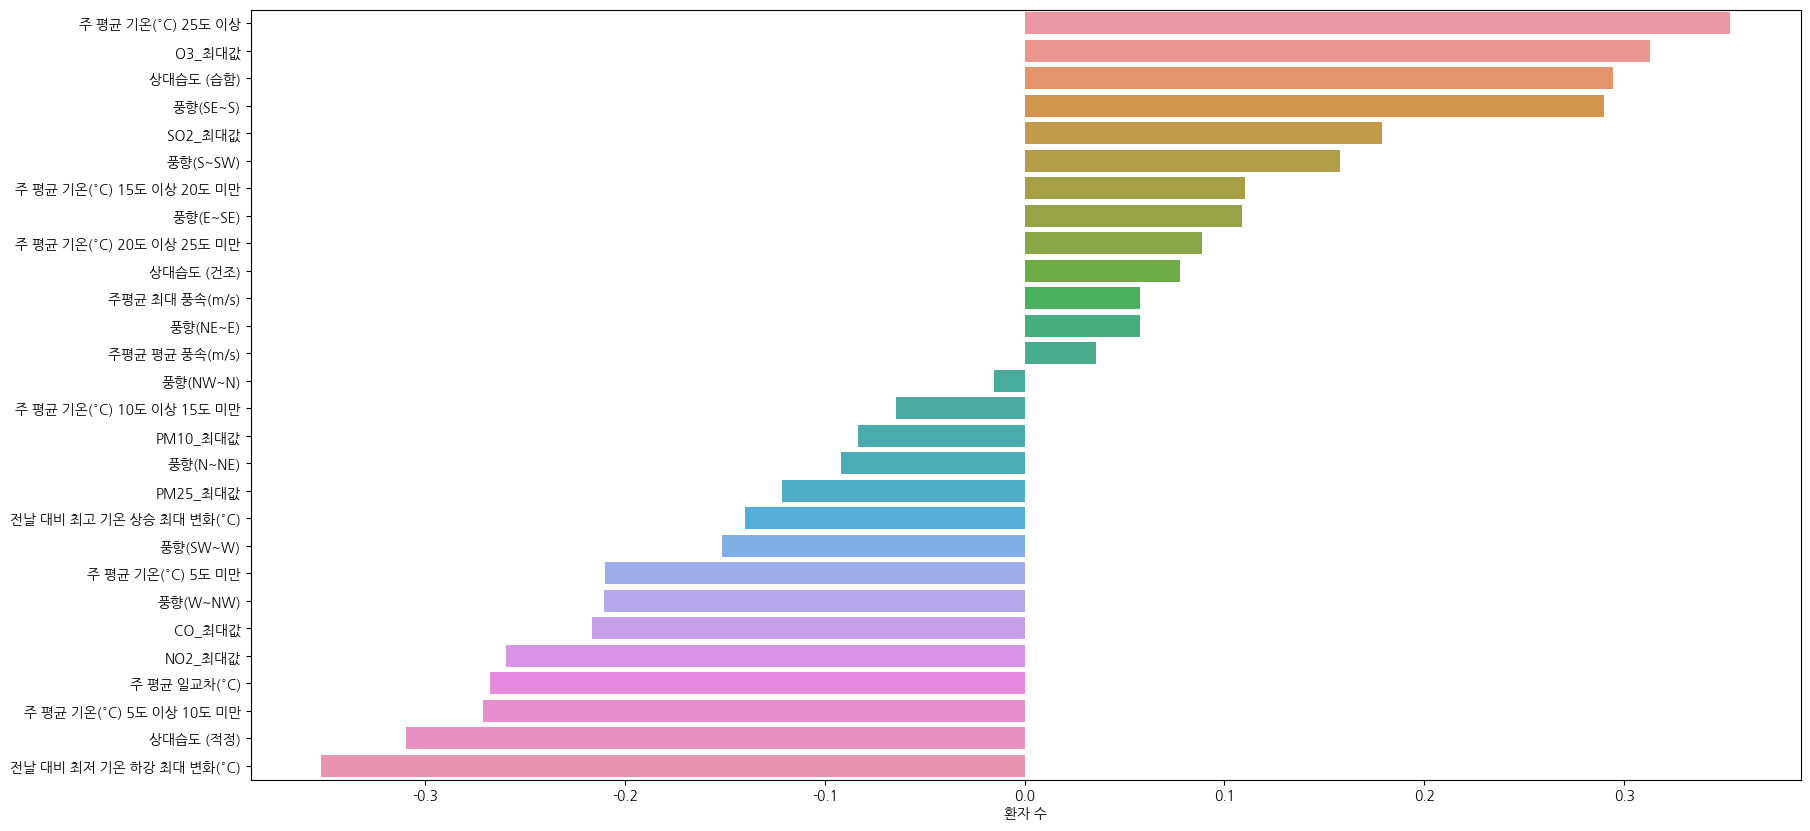

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '부산'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 울산 지역(17~19)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

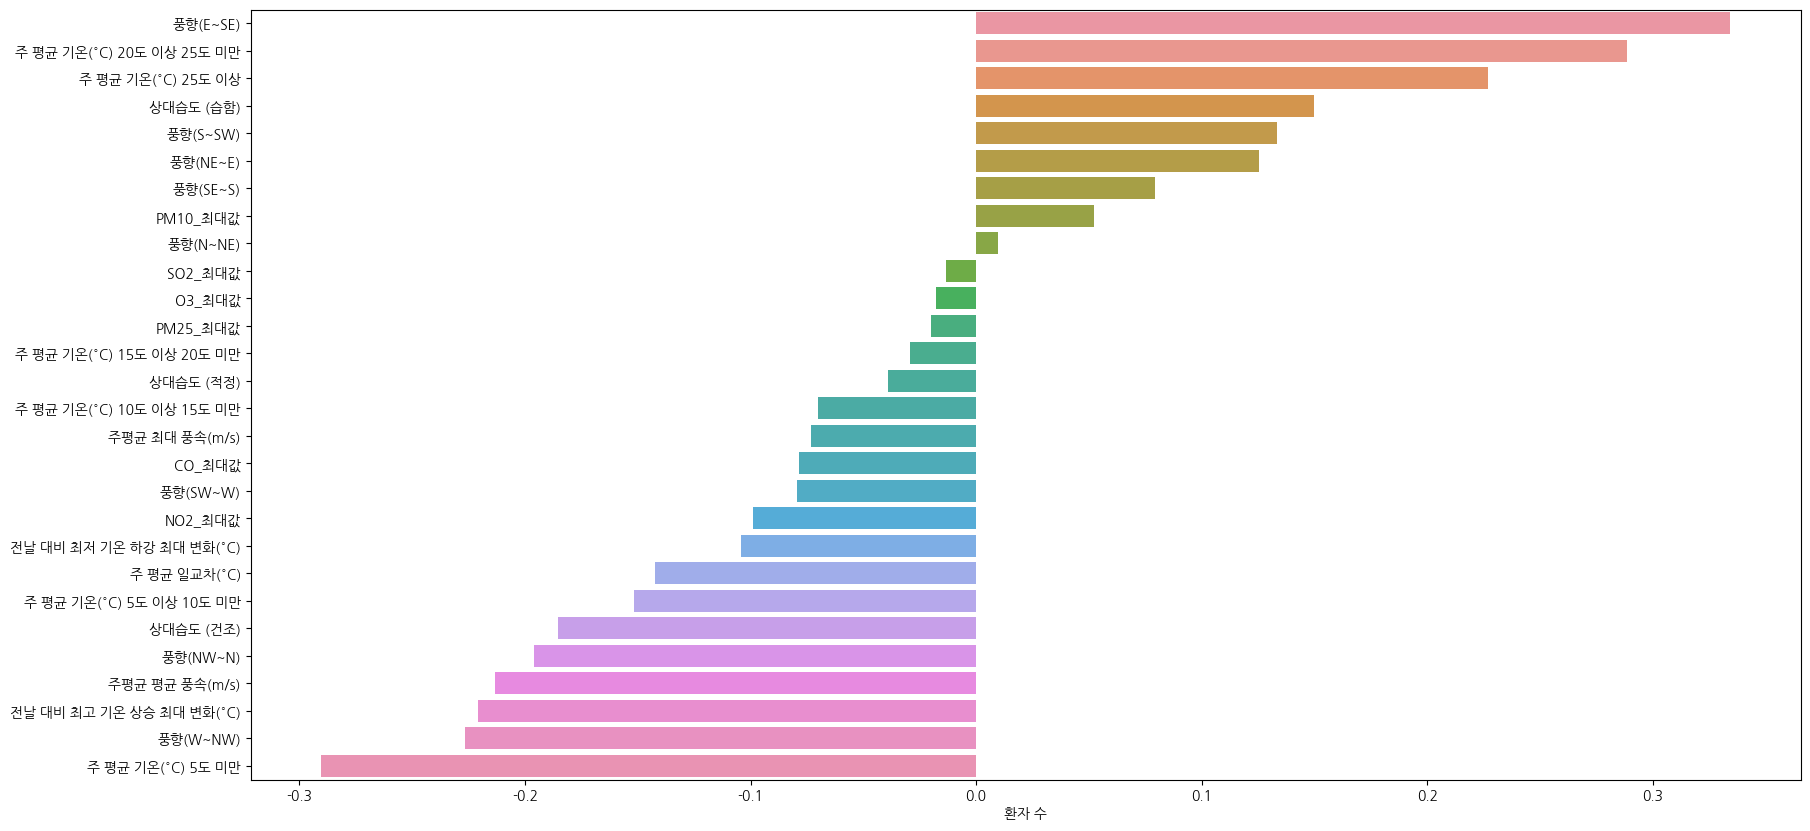

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_17[data_17['지역'] == '울산'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

## 울산 지역(20~21)의 환자 수에 대한 각 변수의 상관계수

<Axes: xlabel='환자 수'>

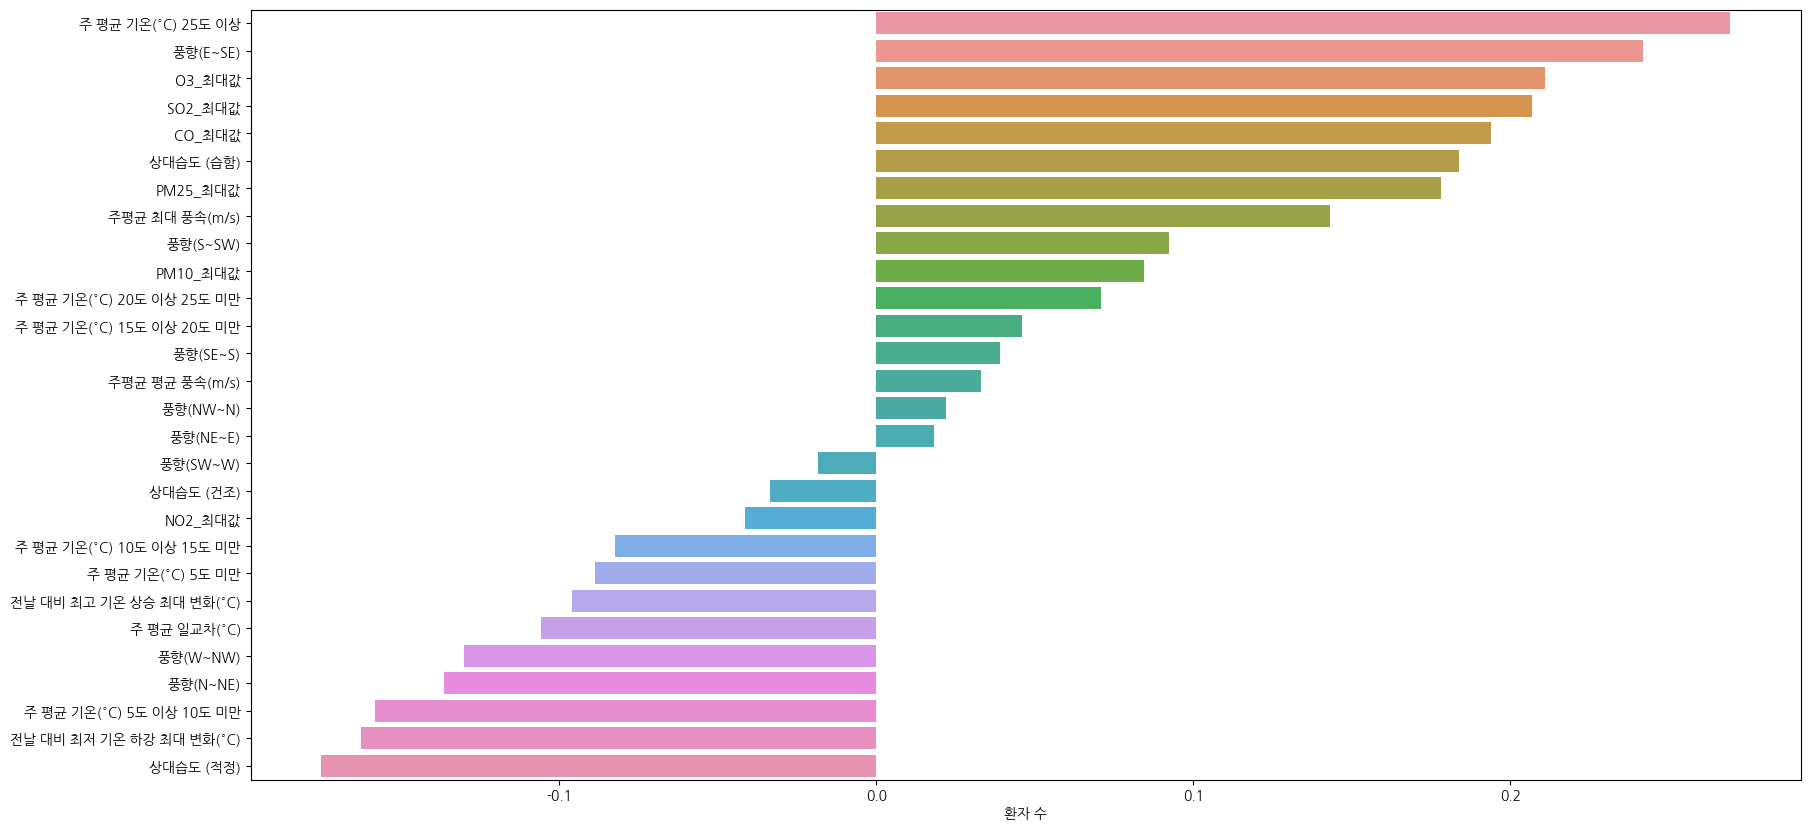

In [ ]:
plt.figure(figsize=(20, 10))
corr = data_20[data_20['지역'] == '울산'].drop(['주', '년', '100만명 당 환자수'], axis=1).corr()['환자 수'].sort_values(ascending=False)[1:]
sns.barplot(x=corr, y=corr.index)

# 모델링

In [ ]:
data_17 = pd.get_dummies(data_17, columns=['지역'])
data_20 = pd.get_dummies(data_20, columns=['지역'])

In [ ]:
data_17_train = data_17[data_17['년'].isin([2017, 2018])]
data_17_test = data_17[data_17['년'].isin([2019])]

data_20_train = data_20[data_20['년'].isin([2020])]
data_20_test = data_20[data_20['년'].isin([2021])]

In [ ]:
data_17_train.drop(['년', '주'], axis=1, inplace=True)
data_17_test.drop(['년', '주'], axis=1, inplace=True)
data_20_train.drop(['년', '주'], axis=1, inplace=True)
data_20_test.drop(['년', '주'], axis=1, inplace=True)

In [ ]:
x_17_train = data_17_train.drop(['환자 수', '100만명 당 환자수'], axis=1)
y_17_train = data_17_train['환자 수']
x_17_test = data_17_test.drop(['환자 수','100만명 당 환자수'], axis=1)
y_17_test = data_17_test['환자 수']

x_20_train = data_20_train.drop(['환자 수','100만명 당 환자수'], axis=1)
y_20_train = data_20_train['환자 수']
x_20_test = data_20_test.drop(['환자 수','100만명 당 환자수'], axis=1)
y_20_test = data_20_test['환자 수']

In [ ]:
'''x_17_train = data_17_train.drop(['환자 수', '100만명 당 환자수'], axis=1)
y_17_train = data_17_train['100만명 당 환자수']
x_17_test = data_17_test.drop(['환자 수','100만명 당 환자수'], axis=1)
y_17_test = data_17_test['100만명 당 환자수']

x_20_train = data_20_train.drop(['환자 수','100만명 당 환자수'], axis=1)
y_20_train = data_20_train['100만명 당 환자수']
x_20_test = data_20_test.drop(['환자 수','100만명 당 환자수'], axis=1)
y_20_test = data_20_test['100만명 당 환자수']'''

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error

### 선형회귀

In [ ]:
model = LinearRegression()

model.fit(x_17_train, y_17_train)
y_17_pred = model.predict(x_17_test)

print('r2 score : ' , r2_score(y_17_test, y_17_pred))
print('mean_squared_error : ', mean_squared_error(y_17_test, y_17_pred))

r2 score :  0.9609805926075371
mean_squared_error :  226.10706151342015


In [ ]:
model.coef_, model.intercept_

(array([ 2.71992566e-01, -8.31160836e-01, -7.62590321e-01, -1.47320595e-01,
         4.19576902e-01, -4.66784886e+01,  1.87079720e+00,  2.88389030e+01,
         4.70000620e+01, -1.45254350e-02, -3.06136676e-02, -3.52245085e-01,
        -1.13046008e-01, -1.92045375e-01, -2.95861188e-01, -6.60556707e-02,
         1.70788438e-01,  1.33635462e+00, -4.87889734e-01, -7.31000068e+00,
        -3.42303989e+00, -7.62384715e-01, -4.34041048e-01,  4.63751969e+00,
         7.29194664e+00, -3.87355988e+00,  3.16685919e+00,  7.06700687e-01,
        -4.60322958e+01, -3.02870098e+01, -2.76963557e+01, -1.78461292e+01,
         1.69049450e+02, -5.43829026e+01,  7.19524274e+00]),
 77.67819062582622)

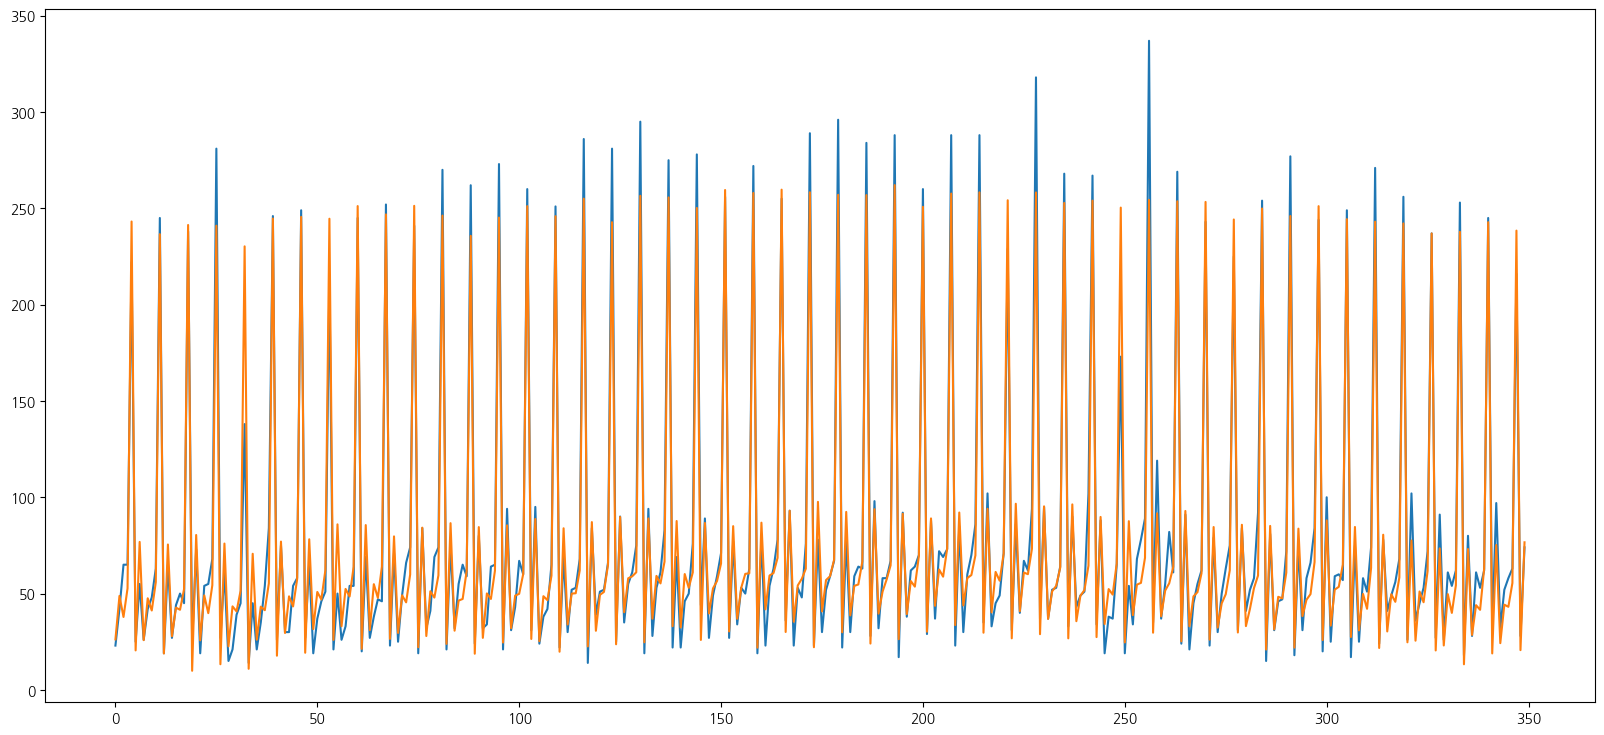

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
plt.plot(y_17_test.values)
plt.plot(y_17_pred)

In [ ]:
model = LinearRegression()

model.fit(x_20_train, y_20_train)
y_20_pred = model.predict(x_20_test)

print('r2 score : ' , r2_score(y_20_test, y_20_pred))
print('mean_squared_error : ', mean_squared_error(y_20_test, y_20_pred))

r2 score :  0.9311418142538582
mean_squared_error :  438.99147937115663


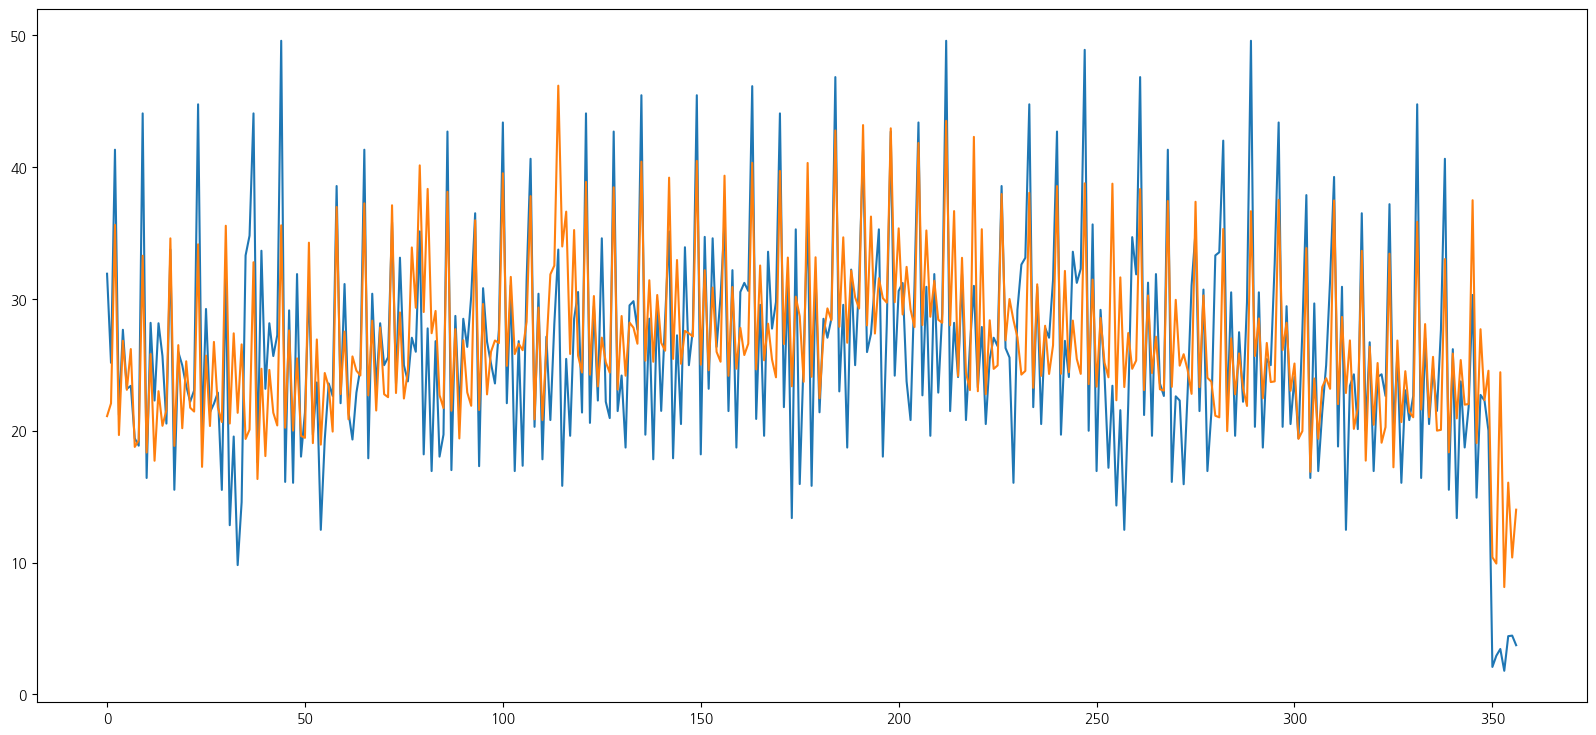

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
plt.plot(y_20_test.values)
plt.plot(y_20_pred)

### DecisionTree Regressor

In [ ]:
model = DecisionTreeRegressor(max_depth=4)

model.fit(x_17_train, y_17_train)
y_17_pred = model.predict(x_17_test)

print('r2 score : ' , r2_score(y_17_test, y_17_pred))
print('mean_squared_error : ', mean_squared_error(y_17_test, y_17_pred))

r2 score :  0.5492914962459665
mean_squared_error :  27.449762082744616


In [ ]:
from sklearn.tree import plot_tree

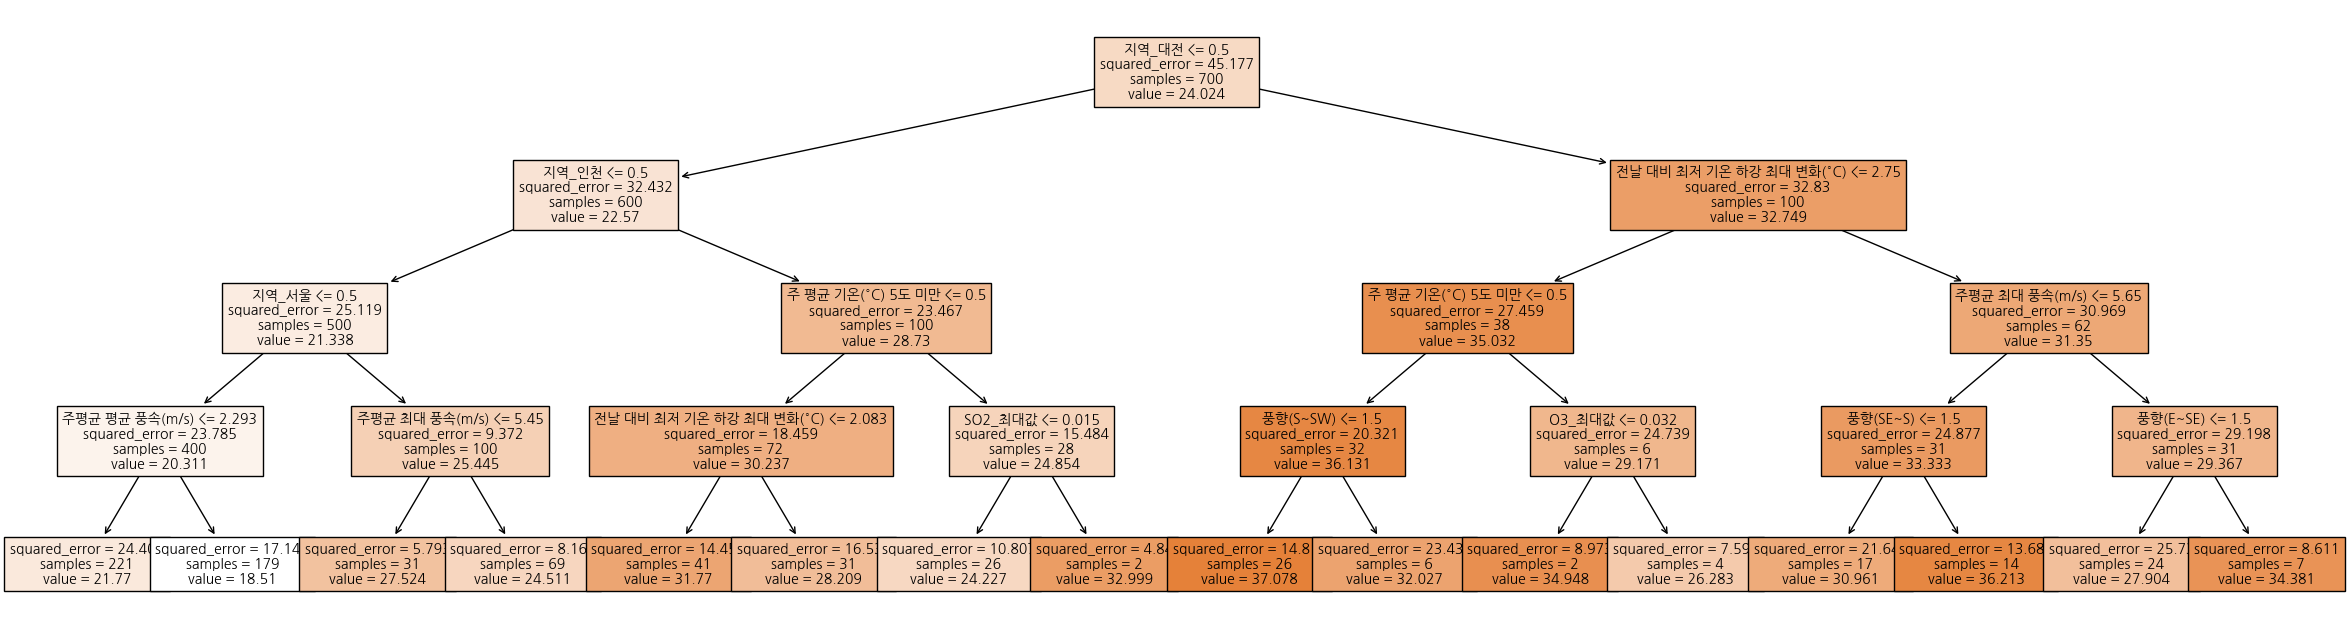

In [ ]:
plt.figure(figsize = (30, 8))
plot_tree(model, feature_names = x_17_train.columns,
          filled = True, fontsize = 10)
plt.show()

### RandomForest Regressor

In [ ]:
model = RandomForestRegressor()

model.fit(x_17_train, y_17_train)
y_17_pred = model.predict(x_17_test)

print('r2 score : ' , r2_score(y_17_test, y_17_pred))
print('mean_squared_error : ', mean_squared_error(y_17_test, y_17_pred))

r2 score :  0.9564294737086217
mean_squared_error :  252.47958200000002


In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
# SHAP 값으로 모델의 예측 설명하기
explainer1 = shap.TreeExplainer(model)
shap_values1 = explainer1.shap_values(x_17_test)

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
s# 13번째 데이터에 대한 shap값 분석해보기
id = 13
display(x_17_test.iloc[id:id+1, :])
display(pd.DataFrame(shap_values1[id:id+1, :], columns = list(x_17_test)))

# shap 그래프 출력
shap.initjs()
shap.force_plot(explainer1.expected_value, shap_values1[id, :],
                x_17_test.iloc[id,:])

,주 평균 일교차(°C),전날 대비 최고 기온 상승 최대 변화(°C),전날 대비 최저 기온 하강 최대 변화(°C),주평균 최대 풍속(m/s),주평균 평균 풍속(m/s),SO2_최대값,CO_최대값,O3_최대값,NO2_최대값,PM10_최대값,PM25_최대값,풍향(N~NE),풍향(NE~E),풍향(E~SE),풍향(SE~S),풍향(S~SW),풍향(SW~W),풍향(W~NW),풍향(NW~N),주 평균 기온(°C) 5도 미만,주 평균 기온(°C) 5도 이상 10도 미만,주 평균 기온(°C) 10도 이상 15도 미만,주 평균 기온(°C) 15도 이상 20도 미만,주 평균 기온(°C) 20도 이상 25도 미만,주 평균 기온(°C) 25도 이상,상대습도 (건조),상대습도 (적정),상대습도 (습함),지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_울산,지역_인천
713,7.890476,4.266667,4.4,9.6,3.185714,0.007857,0.585714,0.058143,0.037143,44.142857,23.0,0,0,0,1,0,0,0,6,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


,주 평균 일교차(°C),전날 대비 최고 기온 상승 최대 변화(°C),전날 대비 최저 기온 하강 최대 변화(°C),주평균 최대 풍속(m/s),주평균 평균 풍속(m/s),SO2_최대값,CO_최대값,O3_최대값,NO2_최대값,PM10_최대값,PM25_최대값,풍향(N~NE),풍향(NE~E),풍향(E~SE),풍향(SE~S),풍향(S~SW),풍향(SW~W),풍향(W~NW),풍향(NW~N),주 평균 기온(°C) 5도 미만,주 평균 기온(°C) 5도 이상 10도 미만,주 평균 기온(°C) 10도 이상 15도 미만,주 평균 기온(°C) 15도 이상 20도 미만,주 평균 기온(°C) 20도 이상 25도 미만,주 평균 기온(°C) 25도 이상,상대습도 (건조),상대습도 (적정),상대습도 (습함),지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_울산,지역_인천
0,-0.213655,-1.189992,-2.553666,-0.341381,0.513256,0.457537,-0.940134,0.284516,-0.012277,0.383583,0.328421,0.062182,0.013787,-0.061264,-0.283119,0.001505,-1.540951,-0.160948,-1.160855,-1.828857,0.017908,-0.006877,0.056446,-0.070956,-0.104684,0.002055,-0.001899,-0.009362,1.631254,-0.049278,0.012246,-0.811195,-23.975648,1.921217,24.824286
